In [1]:
import  pandas as pd
filepath = "文献统计情况-20200505.xlsx"

def read_excel2(path):
    data_xls = pd.io.excel.ExcelFile(path)
    data={}
    print(data_xls.sheet_names)
    return pd.read_excel(data_xls)
#     for name in data_xls.sheet_names:
#         df=pd.read_excel(data_xls,sheetname=name)
#         data[name]=df
#         print(name)
#         return data


data= read_excel2(filepath)

['Sheet3', 'Sheet4', 'Sheet5']


In [2]:
dicAuth = {'auth':[],'count':[],'organization':[]}
for i,authname in enumerate(data['作者']):
    if authname in dicAuth['auth']:
        index = dicAuth['auth'].index(authname)
        dicAuth['count'][index] = dicAuth['count'][index] +1
    else:
        dicAuth['auth'].append(authname)
        dicAuth['organization'].append(data['机构'][i])
        dicAuth['count'].append(1)
pd_dicAuth = pd.DataFrame(dicAuth)
pd_dicAuth = pd_dicAuth[pd_dicAuth['count']<3]
pd_dicAuth = pd_dicAuth.sort_values(by = 'count',axis = 0,ascending = False)

In [36]:
authTemp

{'name': ['饶跃峰',
  '张幸国',
  '赵青威',
  '梁文权',
  '王文刚',
  '恽榴红',
  '王睿',
  '付桂英',
  '刘泽源',
  '唐山枫',
  '胡小风',
  '郑新生',
  '蒋国强',
  '朱德权',
  '昝佳',
  '丁富新',
  '郑静南',
  '陈华兵',
  '张俊勇',
  '杜丹荣',
  '朱丹丹',
  '牟东升',
  '杨祥良',
  '赵英俊',
  '徐白',
  '沈蕴琪',
  '方晓玲',
  '张丽珺',
  '陈大为',
  '李强',
  '李凯扬',
  '王钊',
  '李良成',
  '张斌',
  '李军',
  '程鹏',
  '邓联东',
  '董岸杰',
  '范立昌',
  '石立华',
  '刘世琛',
  '邱琳',
  '汪晴',
  '张俭',
  '霍宁波',
  '姜建芳',
  '高建青',
  '俞佳',
  '金一',
  '刘建平',
  '朱家壁',
  '陈盛君',
  '赵鑫',
  '吴群',
  '张骏勇',
  '宋靖',
  '闫平,李文,李振青,王文蜀,梁秉文,周亚伟',
  '刘卫,朱姚亮,陈华兵,杨祥良',
  '隋毅,聂赞',
  '刘建平,陆晓红,杨彬',
  '王庆利,张凤琴,赵德恒',
  '李丽,张莉',
  '王建明,周永强,程立华,徐美术',
  '成志毅,陈浩凡',
  '王会娟,张丽霞,孙莉,王乐,张涛,封华',
  '赵志伟,于铁力',
  '史红,叶金翠,钱伯初,张望刚,陈国神',
  '蒋国强,陈军,王勇,马建国,朱德权,丁富新',
  '刘成,胡晋红,朱全刚',
  '史红,叶金翠,张望刚,陈国神',
  '成志毅,陈浩凡,朱辉',
  '蒋国强,陈军,王勇,朱德权,丁富新',
  '王浩,余文荣,孙志达,侯惠民',
  '金一,内田昌希,汪成发,夏目秀视,杉林坚次,森本雍宪',
  '傅若秋,潘亚非',
  '刘莉,郑朝晖,程玲妹,张文传,彭宇行',
  '包家立,梁文权,胡巧红,高建青',
  '王浩,侯惠民',
  '张奇,邓英杰,刘令勉',
  '郑淑坤',
  '魏晓红,梁文权',
  '胡晋红,张万国,郑晓梅',
  '王雅珍,王浩,侯惠民',
  '陈琰,王萍,王祥

In [37]:
writer=pd.ExcelWriter('totalCount.xlsx',engine='xlsxwriter')
dfOneSch = pd.DataFrame(pd_authTemp)
dfOneSch.to_excel(writer,index=False)
writer.save()

In [35]:
data['作者'] =  data['作者'].apply(lambda x: str(x)[:-1] if str(x)[-1]==';' else str(x))
authTemp={'name':[],'size':[]}
count =0;
for i,raw in enumerate(data['作者']):
    rawList = raw.split(';')
    if i == 399:
        print(rawList)
    for auth in rawList: 
        if i == 399:
            print(auth)
        if auth in authTemp['name']:
            index = authTemp['name'].index(auth)
            authTemp['size'][index] = authTemp['size'][index] +1 
        else:
            authTemp['name'].append(auth)
            authTemp['size'].append(1)
print(count)
pd_authTemp= pd.DataFrame(authTemp)
pd_authTemp = pd_authTemp.sort_values(by = 'size',axis = 0,ascending = False)

['程玉钏', '李伟泽', '赵宁', '韩文霞', '付丽娜', '梁泽', '姚姣妮']
程玉钏
李伟泽
赵宁
韩文霞
付丽娜
梁泽
姚姣妮
0


In [14]:
from collections import Counter
for i in range(len(pd_authTemp)):
    auths = pd_authTemp.iloc[i,2]
    name = pd_authTemp.iloc[i,0]
    while name in auths:
        auths.remove(name)
    res=Counter(auths)
    print(pd_authTemp.iloc[i,0],end=' ')
    print(res.most_common(5))


李伟泽 [('赵宁', 9), ('郝保华', 8), ('韩文霞', 6), ('付丽娜', 4), ('梁泽', 4)]
王文刚 [('恽榴红', 7), ('王睿', 7), ('付桂英', 7), ('刘泽源', 7), ('王霞', 1)]


In [2]:
need_year = data[['年']].groupby(['年']).size().reset_index(name='size')
need_org = data[['机构']].groupby(['机构']).size().reset_index(name='size')
need_per = data[['期刊']].groupby(['期刊']).size().reset_index(name='size')
#need_word = data[['关键词']].groupby(['关键词']).size().reset_index(name='size')

In [5]:
need_per[need_per['size']>8]

,期刊,size
49,中国中药杂志,16
61,中国临床药学杂志,9
89,中国医药工业杂志,57
90,中国医药指南,10
92,中国医院药学杂志,21
100,中国实用医药,12
103,中国实验方剂学杂志,11
111,中国新药杂志,19
121,中国现代应用药学,9
126,中国社区医师(医学专业),11


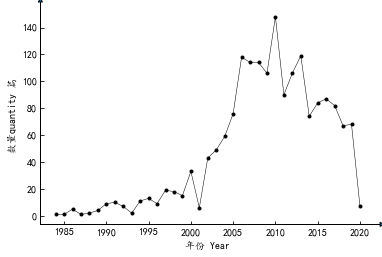

In [146]:
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist  as axisartist
fig=plt.figure()
ax=axisartist.Subplot(fig,111)
fig.add_axes(ax)
ax.axis["left"].set_axisline_style("-|>")
ax.axis["bottom"].set_axisline_style("-|>")
ax.axis["right"].set_visible(False)
ax.axis["top"].set_visible(False)
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
squares=need_year['size']
x=need_year['年']
# 设置线宽
# 设置图表标题，并给坐标轴添加标签
#plt.title("square of 'x'", fontsize=20)
plt.xlabel(r"年份 Year", fontsize=12)
plt.ylabel(r"数量quantity 篇", fontsize=12)
plt.plot(x, squares, 'black',marker='.',linewidth=0.5)
# 设置坐标轴刻度标记的大小
#plt.tick_params(axis='both', labelsize=10)
plt.show()


In [6]:
writer=pd.ExcelWriter('output.xlsx',engine='xlsxwriter')
need_year.to_excel(writer,startcol=0,sheet_name='Year_Count',index=False)
need_org.to_excel(writer,startcol=2,sheet_name='Year_Count',index=False)
need_per.to_excel(writer,startcol=4,sheet_name='Year_Count',index=False)
need_dicWordAll.to_excel(writer,startcol=6,sheet_name='Year_Count',index=False)
writer.save()

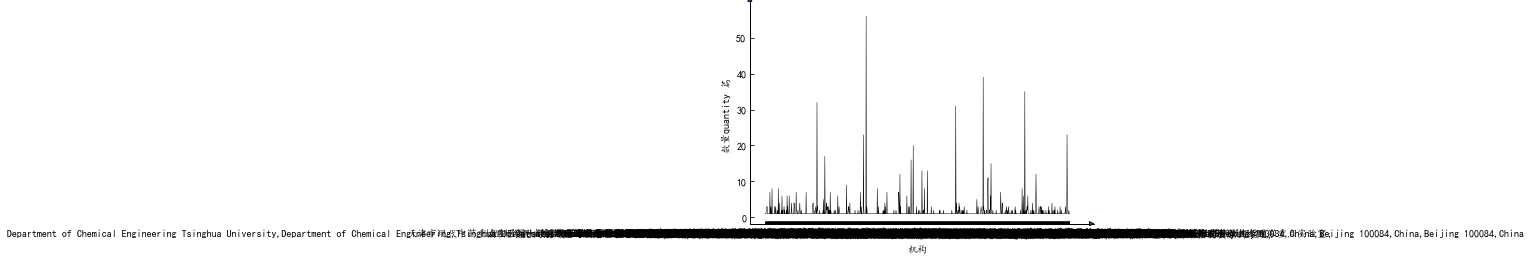

In [110]:

fig=plt.figure()
ax=axisartist.Subplot(fig,111)
fig.add_axes(ax)
ax.axis["left"].set_axisline_style("-|>")
ax.axis["bottom"].set_axisline_style("-|>")
ax.axis["right"].set_visible(False)
ax.axis["top"].set_visible(False)
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
squares=need_org['size']
x=need_org['机构']
# 设置线宽
# 设置图表标题，并给坐标轴添加标签
#plt.title("square of 'x'", fontsize=20)
plt.xlabel(r"机构", fontsize=12)
plt.ylabel(r"数量quantity 篇", fontsize=12)
plt.plot(x, squares, 'black',linewidth=0.5)
# 设置坐标轴刻度标记的大小
#plt.tick_params(axis='both', labelsize=10)
plt.show()


In [134]:
wordky= ["经皮给药","透皮给药","经皮","透皮","经皮给药系统","透皮给药系统"]
dicWord = {}
for key in wordky:
    dicWord[key] = 0
    for raw in list(need_word['关键词']):
        if key in raw:
            dicWord[key] = dicWord[key] +1 

In [5]:
dicAll = {}
for raw in list(data['关键词']):
    raw = raw.replace("；",";")
    for word in raw.split(";"):
        if word in dicAll.keys():
            dicAll[word] = dicAll[word] +1
        else:
            dicAll[word] = 1 
dicAllPd = {'关键字':[],'size':[]}
for item in dicAll.items():
    if item[1] >= 30 :
        dicAllPd['关键字'].append(item[0])
        dicAllPd['size'].append(item[1])
need_dicWordAll = pd.DataFrame(dicAllPd)

In [161]:
sorted(dicAll.items(),key=lambda x:x[1],reverse=True)
need_dicWordAll

,关键字,size
0,经皮给药,605
1,透皮给药,187
2,经皮,798
3,透皮,386
4,经皮给药系统,68


In [1]:
lll=[[1,2,3],[4,5,6],[4,5,6],[4,5,6],[4,5,6],[7,8,9]]
lll[2].extend([4,5,6])
lll

[[1, 2, 3], [4, 5, 6], [4, 5, 6, 4, 5, 6], [4, 5, 6], [4, 5, 6], [7, 8, 9]]